In [2]:
!ls *.json

Hconf_sched_sccrosscontext.json  hypst.json	   out.json
hyps.json			 longcontext.json


In [3]:
import torch, torch.nn as nn, numpy as np, tools, model_utils, math
from typing import List, Dict, Tuple, Callable, Union, Optional
from os.path import join
import subprocess
from importlib import reload

In [31]:
reload(tools)

<module 'tools' from '/exp/exp1/acp21rjf/deliberation/Custom/ami/tools.py'>

In [32]:
def unpack_nested_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

In [33]:
data = tools.load_json('out.json')

In [6]:
speakers = data['speakers']

In [7]:
hyps = data['hyps']
refs = data['refs']

In [8]:
encoded_lens = data['encoded_lens']

In [9]:
refname, hypname = tools.write_trn_files(refs=refs, hyps=hyps, speakers=speakers, encoded_lens=encoded_lens, out_dir='./trns')

Writing trn files to ./trns
No fname provided. Using 2022-10-05_12-51-05-622631 (date) for fname.
Writing ./trns/ref_2022-10-05_12-51-05-622631.trn and ./trns/hyp_2022-10-05_12-51-05-622631.trn
All Done


In [10]:
sclite_path = '/exp/exp1/acp21rjf/SCTK/bin/sclite'
trns/ref_test.trn -h trns/hyp_test.trn -i rm -o dtl stdout >

SyntaxError: invalid syntax (58137723.py, line 2)

In [2]:
def read_text(filename:str) -> List[str]:
    with open(filename, 'r') as f:
        return f.read().splitlines()

In [12]:
import os

In [13]:
def check_exists(path:str):
    assert os.path.exists(path), f'{path} does not exist'

In [14]:
dir(map(check_exists, [sclite_path, refname, hypname, '']))

NameError: name 'sclite_path' is not defined

In [15]:
def eval_with_sclite(ref, hyp, mode='dtl all'):
    list(map(check_exists, [ref, hyp]))
    cmd = f'{sclite_path} -r {ref} -h {hyp} -i rm -o {mode} stdout > {hyp}.out'
    run_cmd(cmd)
    outf = read_text(f'{hyp}.out')
    wer = [el for el in outf if 'Percent Total Error' in el][0]
    print(f'Saved output to {hyp}.out')
    return wer

In [16]:
eval_with_sclite(ref=refname, hyp=hypname, mode='dtl all')

NameError: name 'sclite_path' is not defined

In [17]:
out = tools.eval_with_sclite(ref=refname, hyp=hypname, mode='dtl all')

Running /exp/exp1/acp21rjf/SCTK/bin/sclite -r ./trns/ref_2022-10-05_12-51-05-622631.trn -h ./trns/hyp_2022-10-05_12-51-05-622631.trn -i rm -o dtl all stdout > ./trns/hyp_2022-10-05_12-51-05-622631.trn.out
Saved output to ./trns/hyp_2022-10-05_12-51-05-622631.trn.out


In [18]:
with open(out, 'r') as f:
    lines = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'Percent Total Error       =   19.6%   (17684)'

In [19]:
[line for line in lines if 'Percent Total Error' in line]

NameError: name 'lines' is not defined

In [20]:
math.floor(np.random.rand() * 1000)

26

In [3]:
import datetime
def get_date():
    return str(datetime.datetime.now()).replace(' ', '_').replace(':', '-').replace('.', '-')

In [4]:
get_date()

'2022-10-06_11-43-35-756468'

In [5]:
def write_trn_files(refs:List[str], hyps:List[str], speakers:List[str]=[], encoded_lens:List[int]=[], fname:str='date', out_dir:str='./'):
    print(f'Writing trn files to {out_dir}')
    assert len(refs) == len(hyps), 'refs and hyps must be the same length'
    if len(speakers) != len(refs):
        speakers = ['any'] * len(refs)
        print('Speaker not provided or not the same length as refs and hyps. Using "any" for all.')
    if len(encoded_lens) != len(refs):
        encoded_lens = [-1] * len(refs)
        print('Encoded lens not provided or not the same length as refs and hyps. Using -1 for all.')

    if fname == 'date':
        fname = get_date()
        print(f'No fname provided. Using {fname} (date) for fname.')
    fname = fname if fname.endswith('.trn') else fname + '.trn'
    
    refname = join(out_dir, 'ref_' + fname)
    hypname = join(out_dir, 'hyp_' + fname)
    print(f'Writing {refname} and {hypname}')
    for i, (ref, hyp, speaker, encoded_len) in enumerate(zip(refs, hyps, speakers, encoded_lens)):
        with open(refname, 'a') as f:
            f.write(f';;len: {encoded_len}\n{ref} ({speaker}_{i})\n')
        with open(hypname, 'a') as f:
            f.write(f';;len: {encoded_len}\n{hyp} ({speaker}_{i})\n')
    print('All Done')
    return refname, hypname

In [24]:
write_trn_files(refs, hyps, speakers, encoded_lens, 'date', './trns')

Writing trn files to ./trns
No fname provided. Using 2022-10-05_12-51-28-184455 (date) for fname.
Writing ./trns/ref_2022-10-05_12-51-28-184455.trn and ./trns/hyp_2022-10-05_12-51-28-184455.trn
All Done


('./trns/ref_2022-10-05_12-51-28-184455.trn',
 './trns/hyp_2022-10-05_12-51-28-184455.trn')

In [25]:
sclite_path = '/exp/exp1/acp21rjf/SCTK/bin/sclite'

In [6]:
def run_cmd(cmd:str):
    print(f'Running {cmd}')
    subprocess.run(cmd, shell=True, check=True)

In [7]:
cmd = f'{sclite_path} -r trns/ref_test.trn -h trns/hyp_test.trn -i rm -o dtl stdout'
run_cmd(cmd)

NameError: name 'sclite_path' is not defined

In [28]:
!{sclite_path} -r trns/ref_test.trn -h trns/hyp_test.trn -i rm -o dtl stdout > trns/test.txt

sclite: <OPTIONS>
sclite Version: 2.10, SCTK Version: 1.3
Input Options:
    -r reffile [ <rfmt> ]
                Define the reference file, and it's format
    -h hypfile [ <hfmt> <title> ]
                Define the hypothesis file, it's format, and a 'title' used
                for reports.  The default title is 'hypfile'.  This option
                may be used more than once.
    -i <ids>    Set the utterance id type.   (for transcript mode only)
    -P          Accept the piped input from another utility.
    -e gb|euc|utf-8 [ case-conversion-localization ]
                Interpret characters as GB, EUC, utf-8, or the default, 8-bit ASCII.
                Optionally, case conversion localization can be set to either 'generic',
                'babel_turkish', or 'babel_vietnamese', 'ukranian'
Alignment Options:
    -s          Do Case-sensitive alignments.
    -d          Use GNU diff for alignments.
    -c [ NOASCII DH ]
                Do the alignment on characters not on 

In [29]:
!cat trns/hyp_test.trn.dtl

cat: trns/hyp_test.trn.dtl: No such file or directory


In [30]:
!ls *.snt.*

ls: cannot access '*.snt.*': No such file or directory


In [31]:
!ls trns

hyp_2022-10-04_22-49-17-215664.trn	hyp_2022-10-05_12-51-28-184455.trn
hyp_2022-10-04_22-49-17-215664.trn.out	ref_2022-10-04_22-49-17-215664.trn
hyp_2022-10-04_23-25-56-224183.trn	ref_2022-10-04_23-25-56-224183.trn
hyp_2022-10-04_23-26-12-764335.trn	ref_2022-10-04_23-26-12-764335.trn
hyp_2022-10-04_23-28-59-207751.trn	ref_2022-10-04_23-28-59-207751.trn
hyp_2022-10-04_23-28-59-207751.trn.out	ref_2022-10-04_23-47-21-778238.trn
hyp_2022-10-04_23-47-21-778238.trn	ref_2022-10-05_12-51-05-622631.trn
hyp_2022-10-04_23-47-21-778238.trn.out	ref_2022-10-05_12-51-28-184455.trn
hyp_2022-10-05_12-51-05-622631.trn	test.txt
hyp_2022-10-05_12-51-05-622631.trn.out


In [4]:
import tools, non_iid_dataloader as niidl, numpy as np, soundfile as sf

In [9]:
corpus = tools.load_corpus()

In [10]:
meetings = niidl.prepare_partition(corpus['test'])

In [11]:
samples = niidl.prepare_samples(meetings, max_duration=60, concat_samples=True, split_speakers=True, gap=0.1, single_speaker_with_gaps=True)

In [12]:
samples

[CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(len=1) [underlying data type: <class 'dict'>],
 CutSet(le

In [494]:
avg_duration = np.mean([sample[0].duration for sample in samples])
lq_duration = np.quantile([sample[0].duration for sample in samples], 0.25)
uq_duration = np.quantile([sample[0].duration for sample in samples], 0.75)
median_duration = np.quantile([sample[0].duration for sample in samples], 0.5)
max_duration = np.max([sample[0].duration for sample in samples])
min_duration = np.min([sample[0].duration for sample in samples])
avg_above_75 = np.mean([sample[0].duration for sample in samples if sample[0].duration > uq_duration])
print(f'Average duration: {avg_duration}\n 25th percentile: {lq_duration}\n 75th percentile: {uq_duration}\n Median: {median_duration}\n Max: {max_duration}\n Min: {min_duration} \n Average duration above 75th percentile: {avg_above_75}')

Average duration: 3.870868060962317
 25th percentile: 0.78325
 75th percentile: 4.106
 Median: 1.539
 Max: 128.5
 Min: 0.272 
 Average duration above 75th percentile: 11.277810087173101


In [495]:
[el for el in samples if el.__len__() > 1]

[CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=8) [underlying data type: <class 'dict'>],
 CutSet(len=27) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=4) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=4) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(len=2) [underlying data type: <class 'dict'>],
 CutSet(l

In [496]:
(len([el for el in samples if el.__len__() > 1]) / len(samples)) * 100

18.93491124260355

In [497]:
audio = [el for el in samples if el.__len__() > 10][0].load_audio()

In [498]:
wav = np.concatenate(audio,1).squeeze()

In [499]:
sf.write('test2.wav', wav, 16000)

In [500]:
!ls

1.ipynb				 plain_text
adafactor.py			 __pycache__
attns				 README.md
checkpoints			 rubbish_bin
create_tokenizer		 scripts
cross_attn_exam.ipynb		 test2.wav
eval_1000_ctc.sh		 tokenizer_spe_bpe_v1000
eval_char_ctc.sh		 tokenizer_spe_bpe_v128
eval_ctc_h_init.py		 tokenizer_spe_char
eval_ctc.py			 tools.py
eval_ctc_reuse.py		 train_H.py
eval_logits			 train_long_context.sh
eval.py				 train.py
eval_script_shuffle_test.sh	 train_rand.py
eval_sc_small_ctc_cfg.sh	 train_sc_ctc.py
eval_small_transducer.sh	 train.sh
Hconf_sched_sccrosscontext.json  train_small_ctc_grouped.sh
hyps.json			 train_small_ctc.sh
hypst.json			 train_small_H_ctc.sh
longcontext.json		 train_small_H_ctc_test.sh
model_utils.py			 train_transducer.py
ngrams				 trns
non_iid_dataloader.py		 Untitled-1.ipynb
out.json			 wandb


In [14]:
def total_words(subsitutions:int, correct:int, deletions:int):
    return subsitutions + correct + deletions

In [15]:
def load_output(path:str):
    with open(path, 'r') as f:
        lines = f.read().split('\n')
    return lines

In [16]:
def get_speakers(line:str):
    return line.split(' ')[-1].replace('(', '').replace(')', '').split('_')[:-1]

In [17]:
def get_sub_del_ins_cor(line:str):
    csdi = [int(el) for el in line.split(' ')[-4:]]
    return {'correct':csdi[0], 'substitutions':csdi[1], 'deletions':csdi[2], 'insertions':csdi[3]}

In [18]:
a = load_output('./trns/hyp_2022-10-06_10-22-44-570606.trn')
#a = load_output('trns/hyp_2022-10-04_15-52-22-390500.trn.out')

FileNotFoundError: [Errno 2] No such file or directory: './trns/hyp_2022-10-06_10-22-44-570606.trn'

In [52]:
aa = load_output('trns/hyp_2022-10-04_16-13-36-713359.trn')

FileNotFoundError: [Errno 2] No such file or directory: 'trns/hyp_2022-10-04_16-13-36-713359.trn'

In [19]:
scores_and_speakers = [[a[i-1],el] for i, el in enumerate(a) if el.startswith('Scores')]

NameError: name 'a' is not defined

In [5]:
def calc_wer(correct:int, substitutions:int, deletions:int, insertions:int):
    return (substitutions + deletions + insertions) / total_words(substitutions, correct, deletions)

In [6]:
speaker_wers = {}
for speakers, scores in scores_and_speakers:
    spks = get_speakers(speakers)
    scrs = get_sub_del_ins_cor(scores)
    num_speakers = len(spks)
    
    if num_speakers not in speaker_wers:
        speaker_wers[num_speakers] = {'correct':0, 'substitutions':0, 'deletions':0, 'insertions':0, 'total_entries':0, 'num_words':[]}
    for k, v in scrs.items():
        speaker_wers[num_speakers][k] += v

    speaker_wers[num_speakers]['num_words'].append(total_words(scrs['substitutions'], scrs['correct'], scrs['deletions']))
    speaker_wers[num_speakers]['total_entries'] += 1

# sort by number of speakers
speaker_wers = {k: v for k, v in sorted(speaker_wers.items(), key=lambda item: item[0])}

for k, v in speaker_wers.items():
    wer = calc_wer(v['correct'], v['substitutions'], v['deletions'], v['insertions'])
    print(f'{k} speakers: {wer}, total entries: {v["total_entries"]}, average words: {np.mean(v["num_words"])}')
    speaker_wers[k]['wer'] = wer

NameError: name 'scores_and_speakers' is not defined

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.barplot(x=[str(el) for el in list(speaker_wers.keys())], y=[v['wer']*100 for k, v in speaker_wers.items()])
plt.xlabel('Number of speakers')
plt.ylabel('WER')
plt.show()
sns.barplot(x=[str(el) for el in list(speaker_wers.keys())], y=[np.mean(v['total_entries']) for k, v in speaker_wers.items()])
plt.xlabel('Number of samples')
plt.ylabel('Number of speakers')
plt.show()

[NeMo W 2022-10-06 14:06:28 nemo_logging:349] /store/store1/software/bin/anaconda3/envs/k2_custom-nemo/lib/python3.8/site-packages/seaborn/categorical.py:638: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
      vals = pd.Series(vals, index=index)
    


ValueError: min() arg is an empty sequence

In [22]:
def extract_sclite_data(hyp:List[str], outputf:List[str]):
    datadict = {}
    for i, line in enumerate(hyp):
        if line.endswith(')'):
            enc_len = int(hyp[i-1].split(' ')[-1])
            id = line.split(' ')[-1].replace('(', '').replace(')', '').lower()
            if id not in datadict:
                datadict[id] = {'encoded_len': None}
            datadict[id]['encoded_len'] = enc_len
    
    speakers_and_scores = [[outputf[i-1],el] for i, el in enumerate(outputf) if el.startswith('Scores')]
    
    for speakers, scores in speakers_and_scores:
        id = speakers.split(' ')[-1].replace('(', '').replace(')', '').lower()
        assert id in datadict, f'{id} not in output file, but is in hyp file, why tho?'
        spks = get_speakers(speakers)
        scrs = get_sub_del_ins_cor(scores)
        num_speakers = len(spks)
        datadict[id] = {**datadict[id], **scrs, 'num_speakers':num_speakers}

    return datadict

def bin_by_length(sclite_data:Dict[str, Dict[str, any]], interval:int=20):

    lengths = [v['encoded_len'] for k, v in sclite_data.items()]
    min_len, max_len = min(lengths), max(lengths)+1
    bins = list(zip(list(range(min_len, max_len, interval)), list(range(min_len+interval, max_len+interval, interval))))

    def get_bin_index(length):
        for i, (start, end) in enumerate(bins):
            if start <= length < end:
                return i
        return -1

    bin_dict = {i: {'correct':0, 'substitutions':0, 'deletions':0, 'insertions':0, 'total_entries':0} for i in range(len(bins))}

    for k, v in sclite_data.items():
        bin_index = get_bin_index(v['encoded_len'])
        assert bin_index != -1, f'bin_index is -1, length: {v["encoded_len"]}, bins: {bins}'
        for k2, v2 in v.items():
            if k2 in bin_dict[bin_index]:
                bin_dict[bin_index][k2] += v2
        bin_dict[bin_index]['total_entries'] += 1
    # replace bin indices with actual bin values
    bin_dict = {f'{bins[k][0]}-{bins[k][1]}': v for k, v in bin_dict.items()}
    # wer for each bin
    for k, v in bin_dict.items():
        bin_dict[k]['wer'] = calc_wer(v['correct'], v['substitutions'], v['deletions'], v['insertions']) if v['total_entries'] > 0 else None
    return bin_dict

In [9]:
#chunk together bins above a certain threshold
def chunk_bins(bins:Dict[str, Dict[str, any]], threshold:int=700):
    new_bins = {}
    newk = str(threshold)+'+'
    for k, v in bins.items():
        if int(k.split('-')[0]) >= threshold:
            if newk not in new_bins:
                new_bins[newk] = {'correct':0, 'substitutions':0, 'deletions':0, 'insertions':0, 'total_entries':0}
            for k2, v2 in v.items():
                if k2 in new_bins[newk]:
                    new_bins[newk][k2] += v2
        else:
            new_bins[k] = v
    # wer for each bin
    for k, v in new_bins.items():
        new_bins[k]['wer'] = calc_wer(v['correct'], v['substitutions'], v['deletions'], v['insertions']) if v['total_entries'] > 0 else None
    return new_bins

In [11]:
import os

In [12]:
hyp_and_output = lambda dir, hypname: (load_output(os.path.join(dir,hypname)), load_output(os.path.join(dir,hypname) + '.out'))

In [20]:
hypothesis, output = hyp_and_output('./trns', 'single_change_speaker60_LM_hyp_2022-10-06_13-41-29-949988.trn')

In [23]:
sclite_data = extract_sclite_data(hypothesis, output)

In [26]:
len_bins = bin_by_length(sclite_data, interval=100)

In [27]:
'''
for k, v in len_bins.items():
    if v['total_entries'] > 60:
        print(f'{k} wer: {v["wer"]}, total entries: {v["total_entries"]}')
    else:
        print(f'{k} wer: {v["wer"]}, total entries: {v["total_entries"]} ------')
'''

'\nfor k, v in len_bins.items():\n    if v[\'total_entries\'] > 60:\n        print(f\'{k} wer: {v["wer"]}, total entries: {v["total_entries"]}\')\n    else:\n        print(f\'{k} wer: {v["wer"]}, total entries: {v["total_entries"]} ------\')\n'

In [29]:
len_bins = chunk_bins(len_bins, threshold=708)

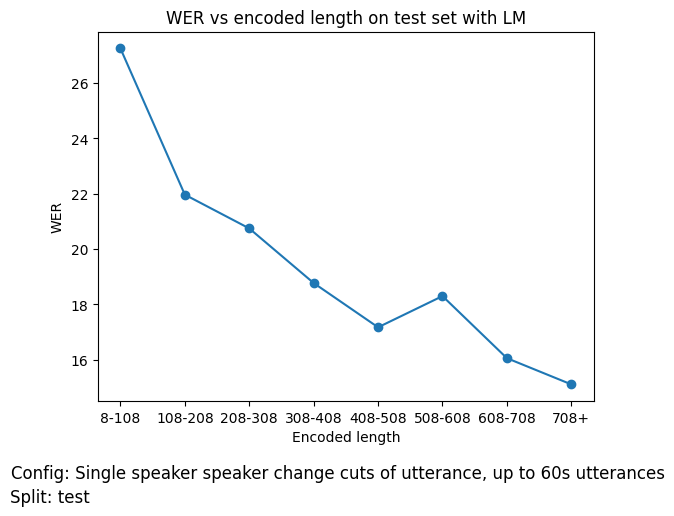

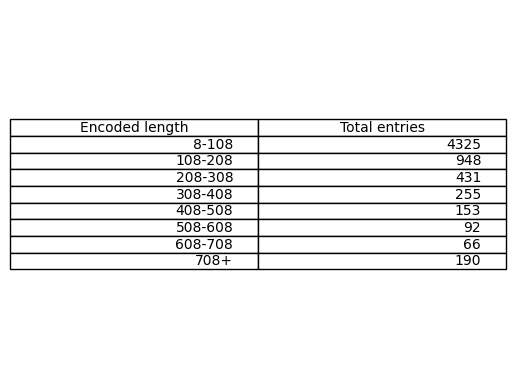

In [51]:
plt.plot([str(k) for k in len_bins.keys() if len_bins[k]['wer'] is not None], [len_bins[k]['wer']*100 for k in len_bins.keys() if len_bins[k]['wer'] is not None], '-o')
plt.xlabel('Encoded length')
plt.ylabel('WER')
plt.title('WER vs encoded length on test set with LM')
txt="Config: Single speaker, speaker change cuts of utterance, up to 60s utterances"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
txt="Split: test"
plt.figtext(0.05, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
# table of total entries per bin
plt.table(cellText=[[str(k), len_bins[k]['total_entries']] for k in len_bins.keys() if len_bins[k]['wer'] is not None], colLabels=['Encoded length', 'Total entries'], loc='center')
plt.axis('off')
plt.show()


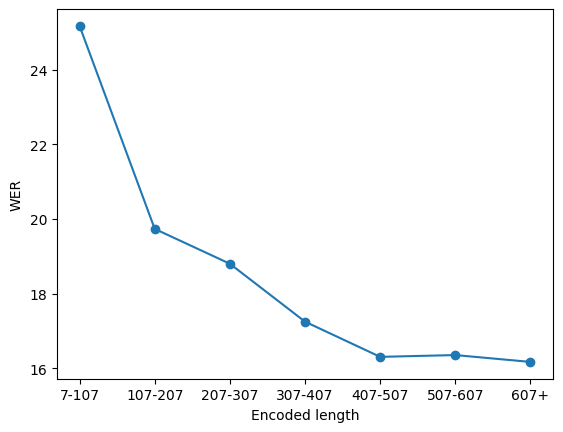

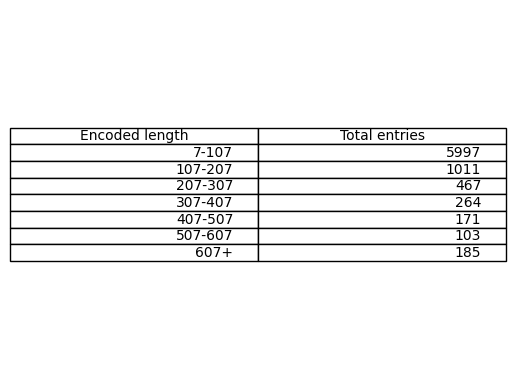

In [621]:
plt.plot([str(k) for k in len_bins.keys() if len_bins[k]['wer'] is not None], [len_bins[k]['wer']*100 for k in len_bins.keys() if len_bins[k]['wer'] is not None], '-o')
plt.xlabel('Encoded length')
plt.ylabel('WER')
plt.show()
# table of total entries per bin
plt.table(cellText=[[str(k), len_bins[k]['total_entries']] for k in len_bins.keys() if len_bins[k]['wer'] is not None], colLabels=['Encoded length', 'Total entries'], loc='center')
plt.axis('off')
plt.show()


In [332]:
len_bins

{'186-686': {'correct': 630,
  'substitutions': 118,
  'deletions': 55,
  'insertions': 27,
  'total_entries': 16},
 '686-1186': {'correct': 10552,
  'substitutions': 1735,
  'deletions': 837,
  'insertions': 316,
  'total_entries': 120},
 '1186-1686': {'correct': 59431,
  'substitutions': 11022,
  'deletions': 5379,
  'insertions': 1825,
  'total_entries': 539},
 '1686-2186': {'correct': 0,
  'substitutions': 0,
  'deletions': 0,
  'insertions': 0,
  'total_entries': 0},
 '2186-2686': {'correct': 0,
  'substitutions': 0,
  'deletions': 0,
  'insertions': 0,
  'total_entries': 0},
 '2686-3186': {'correct': 0,
  'substitutions': 0,
  'deletions': 0,
  'insertions': 0,
  'total_entries': 0},
 '3186-3686': {'correct': 338,
  'substitutions': 51,
  'deletions': 14,
  'insertions': 8,
  'total_entries': 1}}